<h1 style="font-size: 30px; color:turquoise;">Convolutional Autoencoder (CAE) on the CIFAR10-Dataset using Tensorflow</h1>
<h2 style="font-size: 20px;">Authors: Bruno Figura & Daniel Labuda, ML II Projektarbeit Gruppe 2, SoSe24</h2>
-----------------------------------------------------------------------------------------------------


In [43]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from datetime import datetime
import seaborn as sns

from keras.datasets import cifar10
import tensorflow as tf
from keras.models import Model
from keras import layers, models, Input
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

if not os.path.exists('CIFAR10_backups'):
    os.makedirs('CIFAR10_backups')

Training data shape:
 (50000, 32, 32, 3) 

Test data shape:
 (10000, 32, 32, 3) 

Training labels shape:
 (50000, 10) 

Test labels shape:
 (10000, 10)


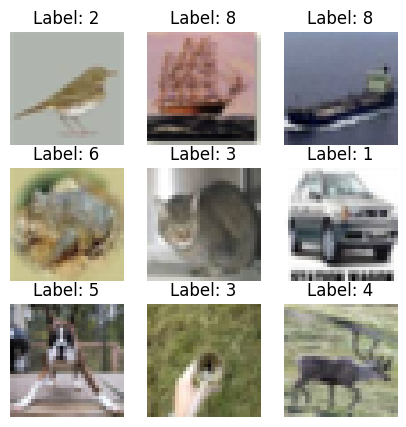

In [44]:
# Split the imported dataset into training and test data. Preprocess (reshape and normalize) the dataset. Print out the shapes of the resulting tensors.
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print("Training data shape:\n", train_data.shape, "\n")
print("Test data shape:\n", test_data.shape, "\n")
print("Training labels shape:\n", train_labels.shape, "\n")
print("Test labels shape:\n", test_labels.shape)

random_indices = np.random.choice(train_data.shape[0], 9, replace=False)
random_images = train_data[random_indices]

plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(random_images[i])
    plt.title(f"Label: {np.argmax(train_labels[random_indices[i]])}")
    plt.axis('off')
plt.show()

In [45]:
#AE same as MNIST, but w.o. the MaxPooling
input_img = Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), padding='same', activation='sigmoid')(x)

# Autoencoder Model
autoencoder = models.Model(input_img, decoded)

# Define CNN Classifier on top of Encoder
flat = layers.Flatten()(encoded)

x = layers.Dense(64, activation='relu')(flat)
x = layers.BatchNormalization(momentum=0.8)(x)
x = layers.Dropout(0.25)(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization(momentum=0.8)(x)
x = layers.Dropout(0.25)(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization(momentum=0.8)(x)
x = layers.Dropout(0.25)(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization(momentum=0.8)(x)
x = layers.Dropout(0.25)(x)

output = layers.Dense(10, activation='softmax')(x)

# Full model including classifier
full_model = Model(input_img, output)

autoencoder.summary()
full_model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_72 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_73 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_74 (Conv2D)          (None, 8, 8, 32)          924

In [46]:
# Compile and train the autoencoder
EPOCHS=100
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#autoencoder.fit(train_data, train_data, batch_size=256, epochs=EPOCHS, validation_data=(test_data, test_data))
#autoencoder.save('CIFAR10_backups/CIFAR10_AE_model_{}epochs_backup_{}.keras'.format(EPOCHS, datetime.now().strftime("%Y-%m-%d_%H-%M-%S")))

# Compile and train the full model
full_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
full_model.fit(train_data, train_labels, batch_size=256, epochs=EPOCHS, validation_data=(test_data, test_labels))
full_model.save('CIFAR10_backups/CIFAR10_CLASS-AE_model_{}epochs_backup_{}.keras'.format(EPOCHS, datetime.now().strftime("%Y-%m-%d_%H-%M-%S")))

Epoch 1/100
196/196 [==============================] - 61s 279ms/step - loss: 1.9934 - accuracy: 0.3190 - val_loss: 1.4770 - val_accuracy: 0.4660
Epoch 2/100
196/196 [==============================] - 60s 304ms/step - loss: 1.4686 - accuracy: 0.4715 - val_loss: 1.3257 - val_accuracy: 0.5116
Epoch 3/100
196/196 [==============================] - 47s 241ms/step - loss: 1.2858 - accuracy: 0.5352 - val_loss: 1.2767 - val_accuracy: 0.5371
Epoch 4/100
196/196 [==============================] - 55s 283ms/step - loss: 1.1713 - accuracy: 0.5829 - val_loss: 1.0694 - val_accuracy: 0.6219
Epoch 5/100
196/196 [==============================] - 53s 270ms/step - loss: 1.1080 - accuracy: 0.6075 - val_loss: 1.0450 - val_accuracy: 0.6241
Epoch 6/100
196/196 [==============================] - 53s 273ms/step - loss: 1.0464 - accuracy: 0.6320 - val_loss: 1.1318 - val_accuracy: 0.5970
Epoch 7/100
196/196 [==============================] - 52s 263ms/step - loss: 0.9979 - accuracy: 0.6501 - val_loss: 1.0273 -

313/313 [==============================] - 4s 13ms/step


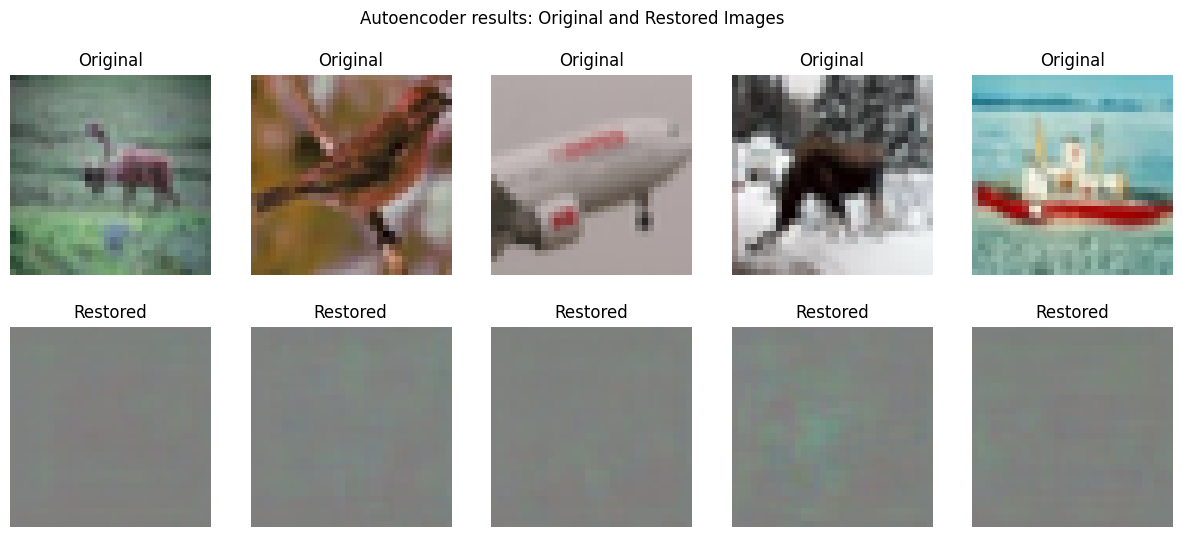

313/313 [==============================] - 2s 6ms/step


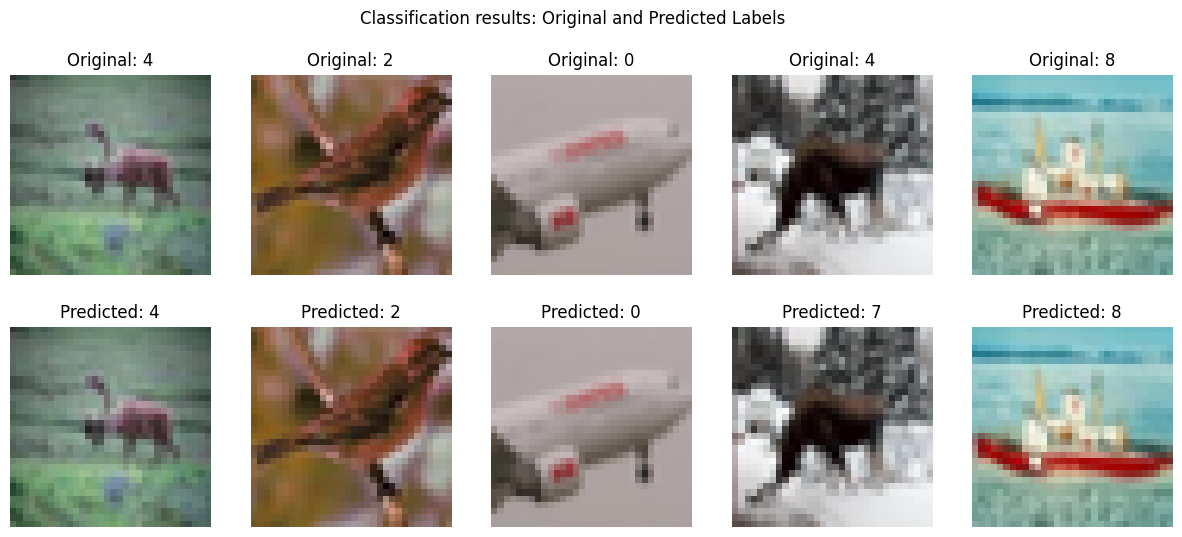

In [47]:
# Plot 5 random input-images to be ran through the CAE as well as the results
num_samples = test_data.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Get the restored images from the autoencoder
restored_imgs = autoencoder.predict(test_data)

# Create a 2x5 grid for displaying results
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Autoencoder results: Original and Restored Images')

for i in range(5):
    random_index = indices[i]

    # Original images
    axes[0, i].imshow(test_data[random_index])
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    # Restored images
    axes[1, i].imshow(restored_imgs[random_index])
    axes[1, i].axis('off')
    axes[1, i].set_title('Restored')

plt.show()

# Display classification results
predictions = full_model.predict(test_data)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Classification results: Original and Predicted Labels')

for i in range(5):
    random_index = indices[i]

    # Original images
    axes[0, i].imshow(test_data[random_index])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original: {np.argmax(test_labels[random_index])}')

    # Predicted labels
    axes[1, i].imshow(test_data[random_index])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Predicted: {np.argmax(predictions[random_index])}')

plt.show()

313/313 [==============================] - 2s 6ms/step


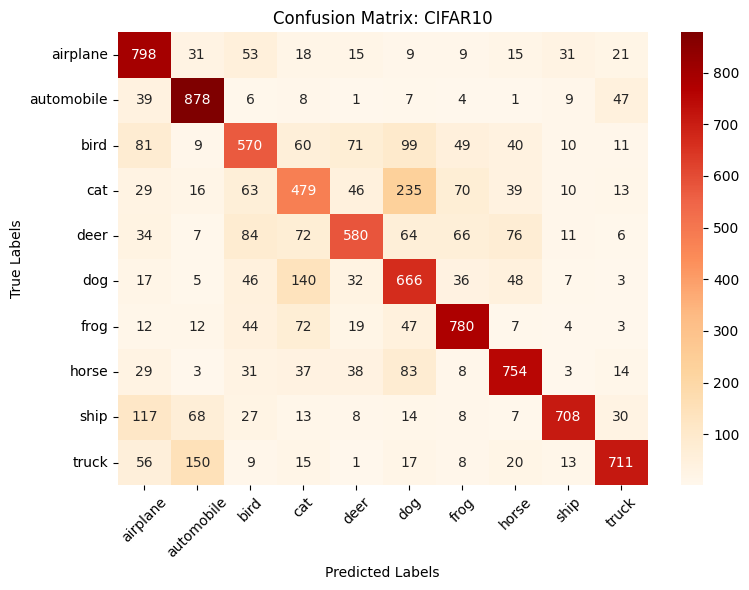

Classification Report:
               precision    recall  f1-score   support

           0      0.658     0.798     0.722      1000
           1      0.745     0.878     0.806      1000
           2      0.611     0.570     0.590      1000
           3      0.524     0.479     0.501      1000
           4      0.715     0.580     0.641      1000
           5      0.537     0.666     0.594      1000
           6      0.751     0.780     0.765      1000
           7      0.749     0.754     0.751      1000
           8      0.878     0.708     0.784      1000
           9      0.828     0.711     0.765      1000

    accuracy                          0.692     10000
   macro avg      0.700     0.692     0.692     10000
weighted avg      0.700     0.692     0.692     10000



In [48]:
# Define CIFAR10 class names
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

# Assuming test_data and test_labels are your test dataset and labels
# Predict the labels for the test data
predicted_labels = np.argmax(full_model.predict(test_data), axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd',
            xticklabels=cifar10_classes, yticklabels=cifar10_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: CIFAR10')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print classification report
report = classification_report(true_labels, predicted_labels, digits=3)
print('Classification Report:\n', report)